# Unsupervised Machine Learning Walkthrough

This walkthrough will give you a real-world example of how AI models are trained. Make sure you read through the file in its entirety and understand each step. If you have questions, shoot them off in the forum!

Let's Goooo and Good Luck!

# NBA Team Dataset
Columns: Team, games_played, points, assist, three-point attempted, two-point made, defensive rebounds, offensive rebounds, steals, and blocks

Lets take a look at the data

In [270]:
!pip install pandas kagglehub scikit-learn seaborn matplotlib

In [271]:
import pandas as pd
import kagglehub
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("mharvnek/nba-team-stats-00-to-18")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'nba-team-stats-00-to-18' dataset.
Path to dataset files: /kaggle/input/nba-team-stats-00-to-18


In [272]:
dataPath = f'/{path}/nba_team_stats_00_to_23.csv'

data = pd.read_csv(dataPath)

data.head()

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24


In [273]:
data.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [274]:
data_sliced = data[['games_played', 'wins', 'losses', 'field_goals_made','field_goals_attempted', 'field_goal_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_point_percentage', 'free_throws_made', 'free_throw_attempted', 'free_throw_percentage','points', 'assists', 'steals', 'blocks', 'defensive_rebounds', 'offensive_rebounds', 'turnovers', 'blocks_attempted', 'personal_fouls', 'personal_fouls_drawn']]

data_sliced.head()

,games_played,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,...,points,assists,steals,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn
0,82,64,18,3601,7396,48.7,1351,3482,38.8,1334,...,9887,2207,557,538,2923,876,979,304,1326,1416
1,82,57,25,3610,7279,49.6,958,2560,37.4,1240,...,9418,2415,585,456,2762,881,1036,394,1489,1467
2,82,57,25,3653,7324,49.9,1090,2805,38.9,1451,...,9847,2223,694,538,2725,722,1039,419,1545,1548
3,82,56,26,3383,6974,48.5,1037,2681,38.7,1461,...,9264,2184,647,497,2807,770,1162,371,1544,1630
4,82,51,31,3473,7108,48.9,1036,2719,38.1,1499,...,9481,2097,640,413,2701,822,1078,384,1519,1537


In [275]:
data_sliced.columns

Index(['games_played', 'wins', 'losses', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'points', 'assists', 'steals', 'blocks', 'defensive_rebounds',
       'offensive_rebounds', 'turnovers', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn'],
      dtype='object')

In [276]:
data_sliced.describe()

,games_played,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,...,points,assists,steals,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.00000
mean,80.430168,40.215084,40.215084,3062.220670,6716.244413,45.573743,654.132682,1828.652235,35.588408,1451.811453,...,8230.385475,1812.224860,609.410615,393.428771,2557.713687,881.349162,1155.023743,393.428771,1668.815642,1303.78352
std,4.286506,12.215024,12.133228,251.252302,446.747528,1.686295,244.858190,658.066269,1.894185,179.820064,...,712.154467,209.520421,73.742012,67.002488,205.076013,121.544171,111.140487,59.046211,175.680398,674.01655
min,64.000000,7.000000,9.000000,2193.000000,5086.000000,40.800000,214.000000,641.000000,27.800000,889.000000,...,5739.000000,1224.000000,390.000000,195.000000,1879.000000,509.000000,738.000000,245.000000,1109.000000,0.00000
25%,82.000000,32.000000,31.000000,2931.750000,6490.750000,44.400000,466.000000,1302.500000,34.400000,1340.500000,...,7838.500000,1680.000000,559.750000,345.000000,2439.750000,794.000000,1086.000000,352.750000,1562.500000,1331.75000
50%,82.000000,41.000000,39.000000,3050.500000,6724.000000,45.500000,606.000000,1662.500000,35.500000,1452.000000,...,8182.500000,1795.500000,605.000000,388.000000,2555.000000,886.000000,1157.000000,392.500000,1676.000000,1604.00000
75%,82.000000,49.000000,49.000000,3208.500000,7018.000000,46.700000,845.500000,2367.250000,36.900000,1568.000000,...,8641.500000,1933.500000,657.000000,439.250000,2701.250000,967.250000,1224.000000,431.000000,1786.000000,1708.00000
max,82.000000,73.000000,72.000000,3855.000000,7739.000000,50.700000,1363.000000,3721.000000,41.600000,1977.000000,...,10110.000000,2522.000000,844.000000,624.000000,3316.000000,1345.000000,1514.000000,565.000000,2189.000000,2104.00000


In [277]:
data_sliced['field_goals_missed'] = data_sliced['field_goals_attempted'] - data_sliced['field_goals_made']
data_sliced['three_pointers_missed'] = data_sliced['three_pointers_attempted'] - data_sliced['three_pointers_made']
data_sliced['free_throw_missed'] = data_sliced['free_throw_attempted'] - data_sliced['free_throws_made']

data_sliced.head()


/tmp/ipython-input-1495008565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced['field_goals_missed'] = data_sliced['field_goals_attempted'] - data_sliced['field_goals_made']
/tmp/ipython-input-1495008565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced['three_pointers_missed'] = data_sliced['three_pointers_attempted'] - data_sliced['three_pointers_made']
/tmp/ipython-input-1495008565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,games_played,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,82,64,18,3601,7396,48.7,1351,3482,38.8,1334,...,538,2923,876,979,304,1326,1416,3795,2131,320
1,82,57,25,3610,7279,49.6,958,2560,37.4,1240,...,456,2762,881,1036,394,1489,1467,3669,1602,388
2,82,57,25,3653,7324,49.9,1090,2805,38.9,1451,...,538,2725,722,1039,419,1545,1548,3671,1715,308
3,82,56,26,3383,6974,48.5,1037,2681,38.7,1461,...,497,2807,770,1162,371,1544,1630,3591,1644,420
4,82,51,31,3473,7108,48.9,1036,2719,38.1,1499,...,413,2701,822,1078,384,1519,1537,3635,1683,318


In [278]:
data_sliced.columns

Index(['games_played', 'wins', 'losses', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'points', 'assists', 'steals', 'blocks', 'defensive_rebounds',
       'offensive_rebounds', 'turnovers', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'field_goals_missed', 'three_pointers_missed',
       'free_throw_missed'],
      dtype='object')

In [279]:
cols_to_divide = [
    col for col in data_sliced.columns
    if col not in ['Team', 'games_played', 'field_goal_percentage',
                   'three_point_percentage', 'free_throw_percentage', 'wins', 'losses']
]

# Perform safe division row-wise
data_sliced[cols_to_divide] = (
    data_sliced[cols_to_divide]
    .apply(lambda x: x / data_sliced['games_played'])
    .round(1)
)

data_sliced.head()


/tmp/ipython-input-3803977865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced[cols_to_divide] = (


,games_played,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,82,64,18,43.9,90.2,48.7,16.5,42.5,38.8,16.3,...,6.6,35.6,10.7,11.9,3.7,16.2,17.3,46.3,26.0,3.9
1,82,57,25,44.0,88.8,49.6,11.7,31.2,37.4,15.1,...,5.6,33.7,10.7,12.6,4.8,18.2,17.9,44.7,19.5,4.7
2,82,57,25,44.5,89.3,49.9,13.3,34.2,38.9,17.7,...,6.6,33.2,8.8,12.7,5.1,18.8,18.9,44.8,20.9,3.8
3,82,56,26,41.3,85.0,48.5,12.6,32.7,38.7,17.8,...,6.1,34.2,9.4,14.2,4.5,18.8,19.9,43.8,20.0,5.1
4,82,51,31,42.4,86.7,48.9,12.6,33.2,38.1,18.3,...,5.0,32.9,10.0,13.1,4.7,18.5,18.7,44.3,20.5,3.9


In [280]:
data = data_sliced.drop(columns=['games_played'])
data_sliced = data.copy()
data_sliced.head()

,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,64,18,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,...,6.6,35.6,10.7,11.9,3.7,16.2,17.3,46.3,26.0,3.9
1,57,25,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,...,5.6,33.7,10.7,12.6,4.8,18.2,17.9,44.7,19.5,4.7
2,57,25,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,...,6.6,33.2,8.8,12.7,5.1,18.8,18.9,44.8,20.9,3.8
3,56,26,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,...,6.1,34.2,9.4,14.2,4.5,18.8,19.9,43.8,20.0,5.1
4,51,31,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,...,5.0,32.9,10.0,13.1,4.7,18.5,18.7,44.3,20.5,3.9


### Calculate Offensive + Defensive Production

In [281]:
data_sliced['two_production'] = (data_sliced['field_goals_made'] - data_sliced['field_goals_missed']) * 2
data_sliced['three_production'] = (data_sliced['three_pointers_made'] - data_sliced['three_pointers_missed']) * 3
data_sliced['ft_production'] = (data_sliced['free_throws_made'] - data_sliced['free_throw_attempted']) * 1

data_sliced['off_ancillary'] = data_sliced['assists'] * .15 + data_sliced['personal_fouls_drawn'] * .10 + data_sliced['turnovers'] * -.5 + data_sliced['offensive_rebounds'] * .25

data_sliced['offensive_production'] = round(data_sliced['two_production'] + data_sliced['three_production'] + data_sliced['ft_production'] + data_sliced['off_ancillary'], 1)
data_sliced['defensive_production'] = round(data_sliced['defensive_rebounds'] * .15 + data_sliced['steals'] * .25 + data_sliced['blocks'] * .25 + data_sliced['personal_fouls'] * .10, 1)

data_sliced.head()

,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,...,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed,two_production,three_production,ft_production,off_ancillary,offensive_production,defensive_production
0,64,18,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,...,17.3,46.3,26.0,3.9,-4.8,-28.5,-3.9,2.490,-34.7,10.3
1,57,25,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,...,17.9,44.7,19.5,4.7,-1.4,-23.4,-4.8,2.590,-27.0,10.0
2,57,25,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,...,18.9,44.8,20.9,3.8,-0.6,-22.8,-3.8,1.805,-25.4,10.6
3,56,26,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,...,19.9,43.8,20.0,5.1,-5.0,-22.2,-5.1,1.230,-31.1,10.5
4,51,31,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,...,18.7,44.3,20.5,3.9,-3.8,-23.7,-3.9,1.660,-29.7,10.0


### Train Test Split Data

In [282]:
X = data_sliced.copy()
X = data_sliced.drop(columns=['offensive_production'])
y = data_sliced['offensive_production']
X.head()

,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,...,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed,two_production,three_production,ft_production,off_ancillary,defensive_production
0,64,18,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,...,16.2,17.3,46.3,26.0,3.9,-4.8,-28.5,-3.9,2.490,10.3
1,57,25,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,...,18.2,17.9,44.7,19.5,4.7,-1.4,-23.4,-4.8,2.590,10.0
2,57,25,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,...,18.8,18.9,44.8,20.9,3.8,-0.6,-22.8,-3.8,1.805,10.6
3,56,26,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,...,18.8,19.9,43.8,20.0,5.1,-5.0,-22.2,-5.1,1.230,10.5
4,51,31,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,...,18.5,18.7,44.3,20.5,3.9,-3.8,-23.7,-3.9,1.660,10.0


In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for testing, 70% for training
    random_state=42,      # ensures reproducibility
)

In [284]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Regression Model

In [285]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
linreg_r2 = reg.predict(X_test_scaled)
linreg_r2 = r2_score(y_test, linreg_r2)

## SVR Classifier

In [286]:
# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
svr_r2 = svr.predict(X_test_scaled)

In [287]:
svr_r2 = r2_score(y_test, svr_r2)

### Random Forest Classifier, Logistic Regression, and SVM Examples

In [288]:
data_sliced['offensive_production'] = round(data_sliced['two_production'] + data_sliced['three_production'] + data_sliced['ft_production'] + data_sliced['off_ancillary'], 0)
data_sliced['defensive_production'] = round(data_sliced['defensive_rebounds'] * .15 + data_sliced['steals'] * .25 + data_sliced['blocks'] * .25 + data_sliced['personal_fouls'] * .10, 0)

In [289]:
X = data_sliced.copy()
X = data_sliced.drop(columns=['offensive_production'])
y = data_sliced['offensive_production']
X.head()

,wins,losses,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,...,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed,two_production,three_production,ft_production,off_ancillary,defensive_production
0,64,18,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,...,16.2,17.3,46.3,26.0,3.9,-4.8,-28.5,-3.9,2.490,10.0
1,57,25,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,...,18.2,17.9,44.7,19.5,4.7,-1.4,-23.4,-4.8,2.590,10.0
2,57,25,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,...,18.8,18.9,44.8,20.9,3.8,-0.6,-22.8,-3.8,1.805,11.0
3,56,26,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,...,18.8,19.9,43.8,20.0,5.1,-5.0,-22.2,-5.1,1.230,11.0
4,51,31,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,...,18.5,18.7,44.3,20.5,3.9,-3.8,-23.7,-3.9,1.660,10.0


## Random Forests Classifier

In [290]:

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [291]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [292]:
y_pred = model.predict(X_test_scaled)

In [293]:
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_acc:.2f}")

Accuracy: 0.08


# Logistic Regression

In [294]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [295]:
# 5. Train model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [296]:
# 6. Evaluate
y_pred = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")

Logistic Regression Accuracy: 0.12


# SVM (Support Vector Machine)

In [297]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [298]:
# 1. Use same scaled data
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [299]:
# 2. Evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.2f}")

SVM Accuracy: 0.10


Model Visualization

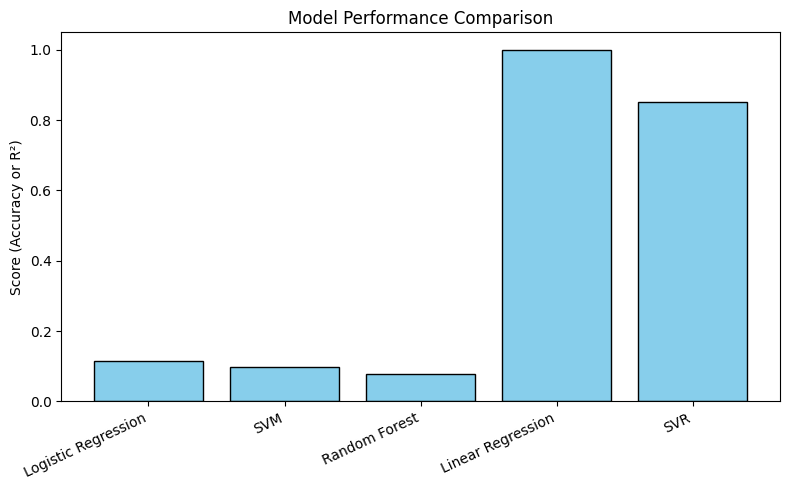

In [300]:
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Linear Regression', 'SVR']
model_scores = [log_reg_acc, svm_acc, rf_acc, linreg_r2, svr_r2]  # your stored scores

plt.figure(figsize=(8,5))
plt.bar(model_names, model_scores, color='skyblue', edgecolor='black')
plt.title('Model Performance Comparison')
plt.ylabel('Score (Accuracy or R²)')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

# Supervised Machine Learning Walkthrough Conclusion

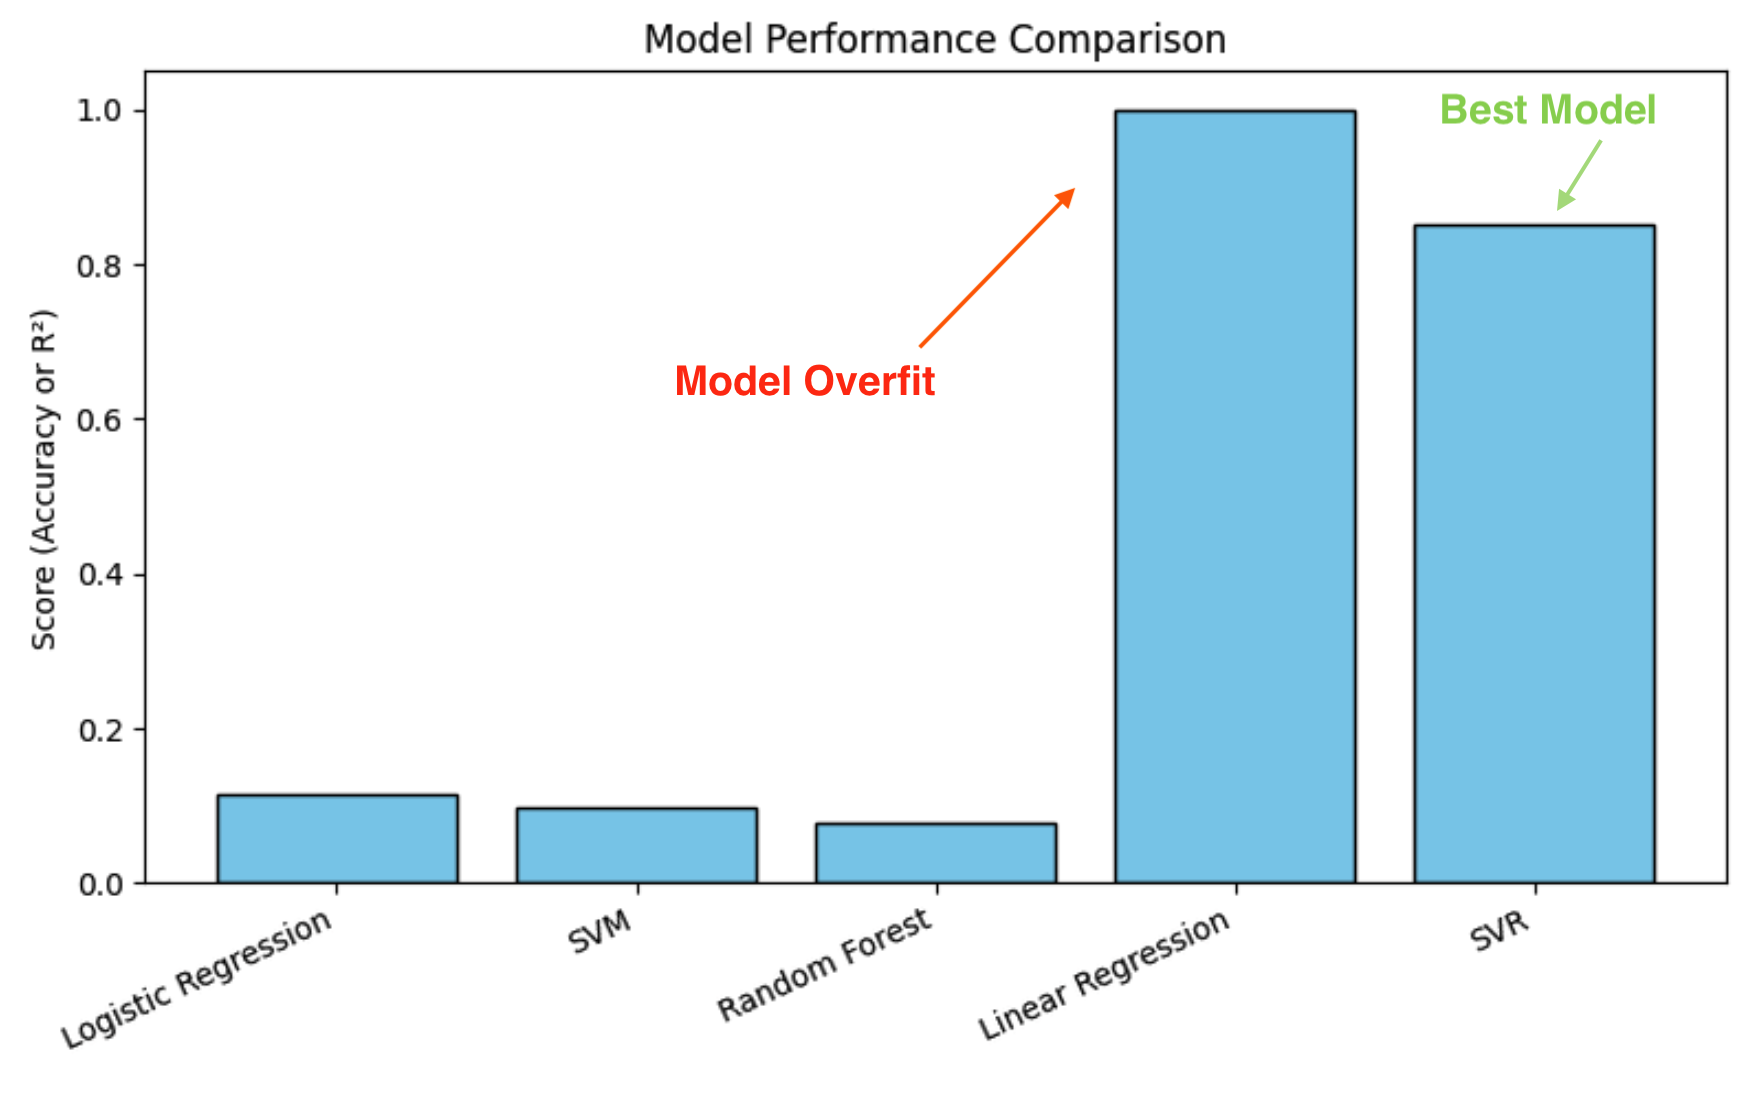

In the end the SVR moddel performed best in predicting 'Offensive Production' based on the features provided.
* We will discuss what ***overfitting*** means in a later section

In this walkthrough, you experienced how a ***supervised machine learning model*** is trained and tested to determine which model would be suit the data and task.

Notice how we *provided the model with the target/predicted column 'offensive production'.* This is the key difference between supervise and unsupervised machine learning. ***Great job, keep up the good work. I will see you in the next lesson!***
